The machine learning pipeline may be automated to a certain extent thanks to automated machine learning (AutoML). The steps in this machine learning pipeline include model training, hyperparameter tweaking, model monitoring, data engineering, and data interpretation.

The degree of complexity in each pipeline step of an end-to-end machine learning project depends on the project itself. The majority of the time is often spent on modeling and data preparation. AutoML frameworks play a role in automating the machine learning workflow.

***BINARY CLASSIFICATION TASK:***

To create a prediction model that can assess a patient's risk of lung cancer using a number of risk markers. Data set description: This dataset includes a list of lung cancer risk factors. This dataset is used to anticipate a patient's likelihood of developing lung cancer based on the input values provided below. Relevant data about the patient are contained in each row of the table.

In [5]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 177.4 MB 43 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.2-py2.py3-none-any.whl size=177521195 sha256=1af703670d1afe9e30d4c69f5e9e4a8d2a59bfc646036cc9347cb1eb4c5ff8ad
  Stored in directory: /root/.cache/pip/wheels/e4/ef/ab/a9b2e452e18b3dfea0b6114bc57c3b9e8b0e464eb2d03230e1
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [ ]:
min_mem_size=6 
run_time=300

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [ ]:
port_no=random.randint(5555,55555)

In [ ]:
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:43074 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpx0j9q2aw
  JVM stdout: /tmp/tmpx0j9q2aw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpx0j9q2aw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:43074
Connecting to H2O server at http://127.0.0.1:43074 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_5v714n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = h2o.import_file('RiskFactors.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.head()

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2
1,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
0,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
1,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
1,68,2,1,2,1,1,2,1,1,1,1,1,1,1,2
0,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [ ]:
df.types

{'GENDER': 'int',
 'AGE': 'int',
 'SMOKING': 'int',
 'YELLOW_FINGERS': 'int',
 'ANXIETY': 'int',
 'PEER_PRESSURE': 'int',
 'CHRONIC_DISEASE': 'int',
 'FATIGUE': 'int',
 'ALLERGY': 'int',
 'WHEEZING': 'int',
 'ALCOHOL_CONSUMING': 'int',
 'COUGHING': 'int',
 'SHORTNESS_OF_BREATH': 'int',
 'SWALLOWING_DIFFICULTY': 'int',
 'CHEST_PAIN': 'int',
 'LUNG_CANCER': 'int'}

In [ ]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].asfactor()
print(df['LUNG_CANCER'].isfactor())

[True]


In [ ]:
df.describe()

Rows:55394
Cols:16

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,0.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
mean,0.502003827129292,44.137614182041325,1.4995306350868336,1.4962992381846407,1.5006137848864498,1.4967686030978076,1.5010470448062982,1.4979239628840675,1.5019135646459905,1.5010650973029576,1.4984474852872165,1.5050546990648797,1.500758204859733,1.49996389500668,1.5016427771960865,
maxs,1.0,87.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,
sigma,0.5000004978097399,15.309217494376208,0.5000042928798124,0.4999908172360575,0.5000041364498418,0.49999407105604166,0.5000034168713465,0.5000002031976855,0.5000008514091558,0.5000033787414793,0.5000021028557717,0.49997896231916983,0.5000039383051423,0.5000045118816887,0.5000018144367121,
zeros,27586,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,69.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,0.0,74.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1
2,1.0,59.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2


In [ ]:
df.shape

(55394, 16)

In [ ]:
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
df_train.head()

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2
1,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
0,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
1,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
1,68,2,1,2,1,1,2,1,1,1,1,1,1,1,2
0,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [ ]:
D=df.columns
print(D)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']


In [ ]:
# Set target and predictor variables
t ='LUNG_CANCER'
#y_numeric ='churn_bit'
D.remove(t) 
#X.remove(y_numeric) 
print(D)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']


In [ ]:
mlreg = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
mlreg.train(x=D,y=t,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20221101_32323_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    24                 24                          10688                  0            16           0.708333      1             710           30.5833

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.24913908098368837
RMSE: 0.49913833852318773
LogLoss: 0.6914227616862223
Mean Per-Class Error: 0.49776727598733783
AUC: 0.5500884920292866
AUCPR: 0.5416055245490536
Gini: 0.10017698405857312

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46628708258424806
       1    2      Error    Rate
-----  ---  -----  -------  -----------------
1      158  22241  0.9929   (22241.0/22399.0)
2      57   21964  0.0026   (57.0/22021.0)
Total  215  44205  0.502    (22298.0/44420.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value      idx
---------------------------  -----------  ---------  -----
max f1                       0.466287     0.663304   138
max f2                       0.460603     0.831163   141
max f0point5                 0.490239     0.557925   84
max accuracy                 0.496324     0.529964   64
max precision                0.529539     0.736842   0
max recall                   0.417339     1          142
max specificity              0.529539     0.99933    0
max absolute_mcc             0.491238     0.0765876  82
max min_per_class_accuracy   0.496324     0.317425   64
max mean_per_class_accuracy  0.496324     0.531788   64
max tns                      0.529539     22384      0
max fns                      0.529539     21979      0
max fps                      0.402283     22399      143
max tps                      0.417339     22021      142
max tnr                      0.529539     0.99933    0
max fnr                      0.529539     0.998093   0
max fpr                      0.402283     1          143
max tpr                      0.417339     1          142

Gains/Lift Table: Avg response rate: 49.57 %, avg score: 49.57 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0107159                   0.521227           1.30522   1.30522            0.647059         0.523658  0.647059                    0.523658            0.0139866       0.0139866                  30.5225   30.5225            0.00648631
2        0.0204187                   0.516821           1.25897   1.28325            0.62413          0.517917  0.636163                    0.52093             0.0122156       0.0262023                  25.8973   28.3246            0.0114695
3        0.0318325                   0.514985           1.22144   1.26109            0.605523         0.515242  0.625177                    0.518891            0.0139412       0.0401435                  22.1439   26.1085            0.0164817
4        0.0429086                   0.512903           1.16848   1.23718            0.579268         0.513308  0.613326                    0.51745             0.0129422       0.0530857                  16.848    23.7181            0.0201824
5        0.0526565                   0.510523           1.21123   1.23238            0.600462         0.510813 

1. Is the relationship significant?

Answer: The link is statistically insignificant, as evidenced by the fact that all of the independent variables' p-values are more than 0.05, as indicated in the table below.

2. Are any model assumptions violated?

Asnwer: The following model assumptions are used for classification: • It presumes that multicollinearity between the independent variables is either negligible or absent. • Generally, accurate prediction requires a large sample size. Because there is no evidence of multicollinearity in the model and the sample size is substantial, no model assumptions are broken (approx. 55,000).

3. Is there any multicollinearity in the model?

Answer: Since all of the predictor variables have absolute correlation coefficients that are less than 0.7, it can be inferred from the correlation matrix that no predictor variable is connected to any other predictor variable. Consequently, the model exhibits no multicollinearity.

4. In the multivariate models are predictor variables independent of all the other predictor variables?

Answer: According to the correlation matrix, since each predictor variable's absolute value is less than 0.7, they are all independent of one another.

5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Answer: The variable significance plot indicates that AGE is the most important predictor variable. According to the correlation matrix, all predictor variables are independent of one another because their combined absolute values are all less than 0.7. As a result, each predictor is independent of the others and crucial for predicting lung cancer.

6. Does the model make sense?

Answer: The model does not make sense, as the most significant variable according to the variable significance graph is AGE, while the most important variable according to the standardized coefficient magnitude is COUGHING. To improve the model, regularization might be used.

7. Does regularization help?

Answer: Yes, regularization is helpful. The difference in error values between train and test data with model regularization is rather minor, compared to the difference in error values between train and test data with unregularized data that is substantially bigger. Regularization therefore assists in overcoming overfitting.

8. Which independent variables are significant?

Answer: All independent factors are insignificant since none of them have a p-value below 0.05.

9. Which hyperparameters are important?

Answer: The number of trees, number of internal trees, model size in bytes, min depth, max depth, mean depth, min leaves, max leaves, and mean leaves are the hyperparameters that are accessible for the DRF model. First, adjusting without specifying a hyperparameter results in an accuracy of 0.5019. After that, setting ntrees, sample rate, and max depth as DRF model hyperparameters raises accuracy to 0.5027. Accuracy is increased to 0.5062 by raising ntrees and max depth further to 100 and 25, respectively. The accuracy is not improved by increasing the hyperparameters ntrees and max depth to 150 and 30, respectively. 

***MULTICLASS CLASSIFICATION :***

One significant shift that we got to see during the early Covid Pandemic is online education. For many students, taking classes online was a new experience, and other students found it difficult to adjust. 

The objective of this task is to identify the variables that have an impact on how adaptable online courses are.

In [1]:
!pip install --user pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.4 MB/s 
     |████████████████████████████████| 1.7 MB 10.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 636 kB 39.6 MB/s 
     |████████████████████████████████| 167 kB 61.5 MB/s 
     |████████████████████████████████| 3.3 MB 48.3 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 25.9 MB 61.0 MB/s 
     |████████████████████████████████| 2.0 MB 42.2 MB/s 
     |████████████████████████████████| 88 kB 5.4 MB/s 
     |████████████████████████████████| 6.8 MB 36.9 MB/s 
     |████████████████████████████████| 4.8 MB 32.9 MB/s 
     |████████████████████████████████| 141 kB 53.7 MB/s 
     |████████████████████████████████| 

In [2]:
import numpy as np 
import pandas as pd 


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [3]:
multi_df = pd.read_csv('students_adaptability_level_online_education.csv')

In [4]:
multi_df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [5]:
multi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [6]:
multi_df.describe().T

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


In [7]:
multi_df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

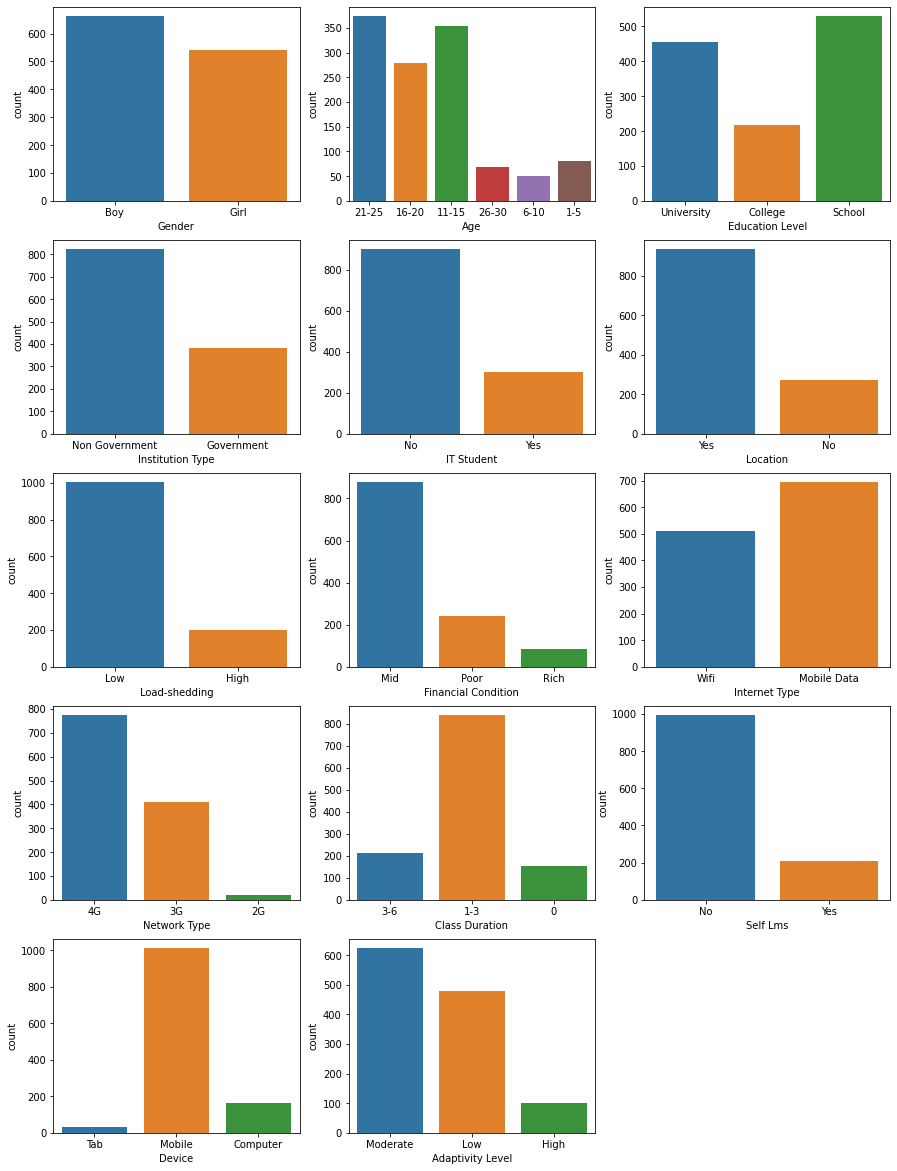

In [8]:
i = 1
plt.figure(figsize = (15,25))
for feature in multi_df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = multi_df)
    i +=1

In [10]:
ml_data = multi_df.sample(frac=0.9, random_state=786)
ml_unseen = multi_df.drop(ml_data.index)

ml_data.reset_index(drop=True, inplace=True)
ml_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(ml_data.shape))
print('Unseen Data For Predictions: ' + str(ml_unseen.shape))

Data for Modeling: (1084, 14)
Unseen Data For Predictions: (121, 14)


In [11]:
from pycaret.classification import *
exp = setup(data = ml_data, target = 'Adaptivity Level', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Adaptivity Level
2,Target Type,Multiclass
3,Label Encoded,"High: 0, Low: 1, Moderate: 2"
4,Original Data,"(1084, 14)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Adaptivity Level',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nume...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', '

In [12]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8932,0.9694,0.8381,0.8978,0.8920,0.8088,0.8118,0.522
dt,Decision Tree Classifier,0.8892,0.9504,0.8356,0.8952,0.8889,0.8029,0.8061,0.020
et,Extra Trees Classifier,0.8892,0.9719,0.8358,0.8932,0.8882,0.8023,0.8050,0.470
lightgbm,Light Gradient Boosting Machine,0.8707,0.9523,0.8069,0.8732,0.8684,0.7664,0.7698,0.181
gbc,Gradient Boosting Classifier,0.8087,0.9094,0.7307,0.8116,0.8042,0.6523,0.6567,0.728
knn,K Neighbors Classifier,0.7573,0.8857,0.6995,0.7653,0.7563,0.5722,0.5768,0.122
lr,Logistic Regression,0.6966,0.7920,0.5793,0.7056,0.6855,0.4336,0.4467,0.623
ridge,Ridge Classifier,0.6913,0.0000,0.5758,0.7026,0.6791,0.4220,0.4373,0.018
lda,Linear Discriminant Analysis,0.6754,0.7913,0.5903,0.6881,0.6676,0.4025,0.4154,0.020
ada,Ada Boost Classifier,0.6411,0.6462,0.5241,0.6378,0.6316,0.3382,0.3414,0.224


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [15]:
model_xg = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.9551,0.8750,0.8960,0.8947,0.8112,0.8122
1,0.8684,0.9788,0.8556,0.8710,0.8689,0.7664,0.7672
2,0.8947,0.9721,0.8306,0.8979,0.8934,0.8083,0.8096
3,0.9079,0.9729,0.7944,0.9125,0.9030,0.8305,0.8334
4,0.8158,0.9515,0.7806,0.8257,0.8183,0.6803,0.6829
5,0.9211,0.9696,0.8556,0.9259,0.9191,0.8580,0.8613
6,0.9211,0.9794,0.8714,0.9260,0.9195,0.8603,0.8635
7,0.9079,0.9685,0.8569,0.9105,0.9068,0.8364,0.8373
8,0.8933,0.9713,0.8222,0.9049,0.8909,0.8053,0.8174


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [19]:
model_dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8684,0.9397,0.8611,0.8711,0.8690,0.7686,0.7693
1,0.8553,0.9502,0.8472,0.8767,0.8620,0.7509,0.7540
2,0.8947,0.9273,0.8306,0.8979,0.8934,0.8083,0.8096
3,0.8816,0.9546,0.7778,0.8800,0.8779,0.7864,0.7882
4,0.8158,0.9179,0.7333,0.8221,0.8177,0.6770,0.6785
5,0.9211,0.9787,0.8556,0.9259,0.9191,0.8580,0.8613
6,0.9342,0.9923,0.8798,0.9372,0.9326,0.8832,0.8852
7,0.9211,0.9715,0.8654,0.9236,0.9198,0.8593,0.8606
8,0.8800,0.9413,0.8111,0.8955,0.8770,0.7803,0.7961


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 7
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [18]:
tuned_xg = tune_model(model_xg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7105,0.8102,0.7444,0.7382,0.7175,0.5103,0.5148
1,0.7368,0.8523,0.7639,0.7586,0.7423,0.5516,0.5552
2,0.7368,0.8130,0.7611,0.7448,0.7382,0.5424,0.5437
3,0.6842,0.8405,0.6889,0.7105,0.6888,0.4698,0.4770
4,0.6974,0.8162,0.7028,0.7791,0.7159,0.5158,0.5376
5,0.7500,0.8793,0.7778,0.7851,0.7582,0.5819,0.5900
6,0.7368,0.8525,0.7390,0.7466,0.7371,0.5524,0.5572
7,0.7105,0.8470,0.7575,0.7530,0.7178,0.5318,0.5437
8,0.8000,0.8778,0.8068,0.8109,0.8028,0.6537,0.6553


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [22]:
tuned_dt = tune_model(model_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8026,0.9012,0.7639,0.8082,0.8026,0.6417,0.6425
1,0.7632,0.8726,0.7389,0.7665,0.7635,0.5817,0.5833
2,0.8289,0.9174,0.7833,0.8294,0.8290,0.6941,0.6943
3,0.7368,0.8932,0.6194,0.7364,0.7334,0.5199,0.5236
4,0.7500,0.8678,0.7333,0.7772,0.7565,0.5760,0.5828
5,0.8026,0.9245,0.7667,0.8067,0.8040,0.6529,0.6535
6,0.7105,0.8967,0.6139,0.7218,0.6985,0.4962,0.5145
7,0.8158,0.8896,0.6382,0.8305,0.7922,0.6613,0.6683
8,0.7600,0.9022,0.6376,0.7576,0.7525,0.5575,0.5616


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 8
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


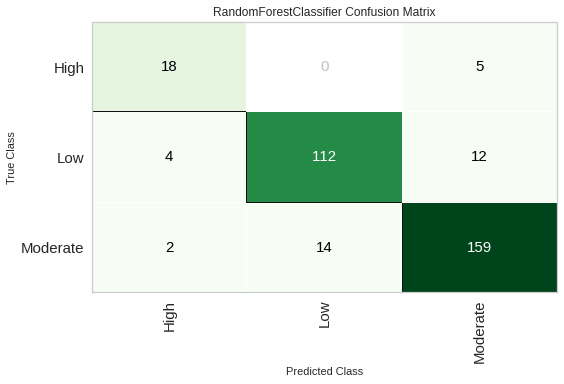

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [24]:
plot_model(model_xg, plot = 'confusion_matrix')

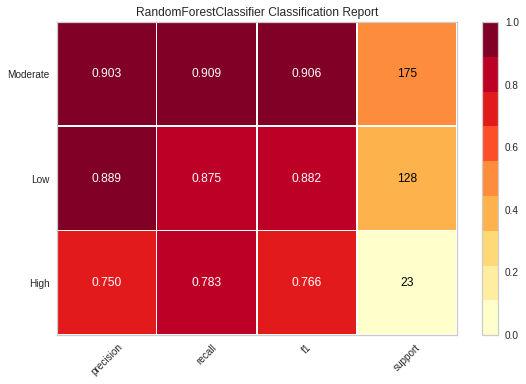

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [25]:
plot_model(model_xg, plot = 'class_report')

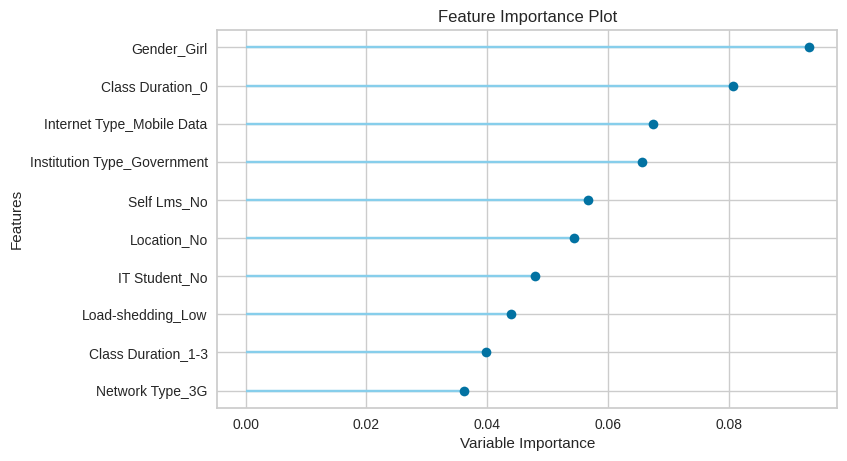

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [32]:
plot_model(model_xg, plot = 'feature')

In [27]:
evaluate_model(model_xg)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [46]:
predict_model(model_xg);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8865,0.9646,0.8554,0.8869,0.8866,0.7948,0.7949


In [47]:
final_xg = finalize_model(model_xg)

unseen_predictions = predict_model(final_xg, data=ml_unseen)
unseen_predictions

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_imp

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0,0.9844,0,0,0,0,0


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Label,Score
0,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low,Low,0.7704
1,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate,Moderate,0.6328
2,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low,Low,1.0000
3,Girl,21-25,University,Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low,Low,0.9500
4,Boy,21-25,University,Non Government,Yes,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate,Moderate,0.8600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Girl,21-25,University,Government,No,No,Low,Mid,Mobile Data,2G,1-3,No,Mobile,Low,Low,0.9800
117,Boy,21-25,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,1-3,Yes,Mobile,Moderate,Moderate,0.9068
118,Boy,21-25,University,Government,No,No,High,Mid,Mobile Data,4G,1-3,No,Mobile,Low,Low,0.9200
119,Boy,1-5,School,Government,No,No,Low,Mid,Mobile Data,4G,0,No,Mobile,Low,Low,0.9800


***REGRESSION TASK :***

Companies' HR departments would wish to anticipate the likelihood that their employees may elect to quit the organization. We can determine the likelihood of their departing or not using several paremeters including education, experience, and pay. Using this dataset, we will build a regression model to estimate the chance that they will leave the organization, as well as analyze the data to produce graphs and charts.

In [5]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt

In [6]:
min_mem_size=6 
run_time=222

In [7]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [8]:
port_no=random.randint(5555,55555)
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:45294 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpfxw4y008
  JVM stdout: /tmp/tmpfxw4y008/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpfxw4y008/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:45294
Connecting to H2O server at http://127.0.0.1:45294 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_axova5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [9]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpq7fgbfqb
  JVM stdout: /tmp/tmpq7fgbfqb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpq7fgbfqb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_i3ovc0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [11]:
reg_df = h2o.import_file('Employee.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
reg_df.head()

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Churn
Bachelors,2017,Bangalore,3,34,Male,No,0,0,nan
Bachelors,2013,Pune,1,28,Female,No,3,1,nan
Bachelors,2014,New Delhi,3,38,Female,No,2,0,nan
Masters,2016,Bangalore,3,27,Male,No,5,1,nan
Masters,2017,Pune,3,24,Male,Yes,2,1,nan
Bachelors,2016,Bangalore,3,22,Male,No,0,0,nan
Bachelors,2015,New Delhi,3,38,Male,No,0,0,nan
Bachelors,2016,Bangalore,3,34,Female,No,2,1,nan
Bachelors,2016,Pune,3,23,Male,No,1,0,nan
Masters,2017,New Delhi,2,37,Male,No,2,0,nan


In [13]:
reg_df.types

{'Education': 'enum',
 'JoiningYear': 'int',
 'City': 'enum',
 'PaymentTier': 'int',
 'Age': 'int',
 'Gender': 'enum',
 'EverBenched': 'enum',
 'ExperienceInCurrentDomain': 'int',
 'LeaveOrNot': 'int',
 'Churn': 'int'}

In [14]:
reg_df.describe()

Rows:4653
Cols:10

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Churn
type,enum,int,enum,int,int,enum,enum,int,int,int
mins,,2012.0,,1.0,22.0,,,0.0,0.0,NaN
mean,,2015.0629701267999,,2.6982591876208906,29.393294648613786,,,2.905652267354396,0.3438641736514077,0.0
maxs,,2018.0,,3.0,41.0,,,7.0,1.0,NaN
sigma,,1.8633768286863306,,0.5614354643364909,4.826087009126051,,,1.5582403309268564,0.47504747514881035,-0.0
zeros,,0,,0,0,,,355,3053,0
missing,0,0,0,0,0,0,0,0,0,4653
0,Bachelors,2017.0,Bangalore,3.0,34.0,Male,No,0.0,0.0,nan
1,Bachelors,2013.0,Pune,1.0,28.0,Female,No,3.0,1.0,nan
2,Bachelors,2014.0,New Delhi,3.0,38.0,Female,No,2.0,0.0,nan


In [15]:
reg_df.shape

(4653, 10)

In [16]:
pct_rows=0.80
train, test = reg_df.split_frame([pct_rows])

In [17]:
print(train.shape)
print(test.shape)

(3738, 10)
(915, 10)


In [18]:
X=reg_df.columns
print(X)

['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot', 'Churn']


In [19]:
y_numeric ='LeaveOrNot'
X.remove(y_numeric) 
print(X)

['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'Churn']


In [20]:
reg_ml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [21]:
reg_ml.train(x=X,y=y_numeric,training_frame=train)

AutoML progress: |
05:54:15.593: _train param, Dropping bad and constant columns: [Churn]
05:54:15.594: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
05:54:20.894: _train param, Dropping bad and constant columns: [Churn]
05:54:20.894: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


05:54:22.697: _train param, Dropping bad and constant columns: [Churn]
05:54:22.697: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
05:54:29.173: _train param, Dropping unused columns: [Churn]
0

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.2269581,0.0089970,0.2183463,0.2206937,0.2382183,0.2349728,0.2225595
mean_residual_deviance,0.1120824,0.0093719,0.1062384,0.1081099,0.1240164,0.1198762,0.1021711
mse,0.1120824,0.0093719,0.1062384,0.1081099,0.1240164,0.1198762,0.1021711
null_deviance,170.22226,11.584363,173.76247,177.88673,177.57587,171.87999,150.00621
r2,0.5051931,0.0295004,0.5413560,0.5222744,0.4726198,0.4774376,0.5122777
residual_deviance,83.85937,8.450084,79.57259,84.97437,93.13632,89.78723,71.8263
rmse,0.3345552,0.0139279,0.3259424,0.3288007,0.3521596,0.3462313,0.3196422
rmsle,0.2351738,0.0074103,0.2303982,0.2322583,0.244422,0.2415227,0.2272679


In [22]:
print(reg_ml.leaderboard)

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20221108_55415  0.334914  0.112167  0.226916  0.23534                   0.112167
StackedEnsemble_AllModels_3_AutoML_1_20221108_55415     0.335121  0.112306  0.228427  0.235442                  0.112306
GBM_grid_1_AutoML_1_20221108_55415_model_12             0.335209  0.112365  0.229088  0.235823                  0.112365
StackedEnsemble_AllModels_2_AutoML_1_20221108_55415     0.337408  0.113844  0.234443  0.237143                  0.113844
StackedEnsemble_BestOfFamily_3_AutoML_1_20221108_55415  0.337609  0.11398   0.235011  0.237187                  0.11398
GBM_5_AutoML_1_20221108_55415                           0.338125  0.114328  0.239982  0.238001                  0.114328
StackedEnsemble_AllModels_1_AutoML_1_20221108_55415     0.33892   0.114866  0.236146  0.238638                  0.114866
GBM_2_AutoML_1_20221108_55415    

In [23]:
model_index=0
glm_index=0
glm_model=''
reg_ml_leaderboard_df=reg_ml.leaderboard.as_data_frame()
models_dict={}
for m in reg_ml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in reg_ml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'StackedEnsemble_BestOfFamily_4_AutoML_1_20221108_55415': 0,
 'StackedEnsemble_AllModels_3_AutoML_1_20221108_55415': 1,
 'GBM_grid_1_AutoML_1_20221108_55415_model_12': 2,
 'GLM_1_AutoML_1_20221108_55415': 70}

In [24]:
print(model_index)
best_model = h2o.get_model(reg_ml.leaderboard[model_index,'model_id'])

2


In [25]:
best_model.algo

'gbm'

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

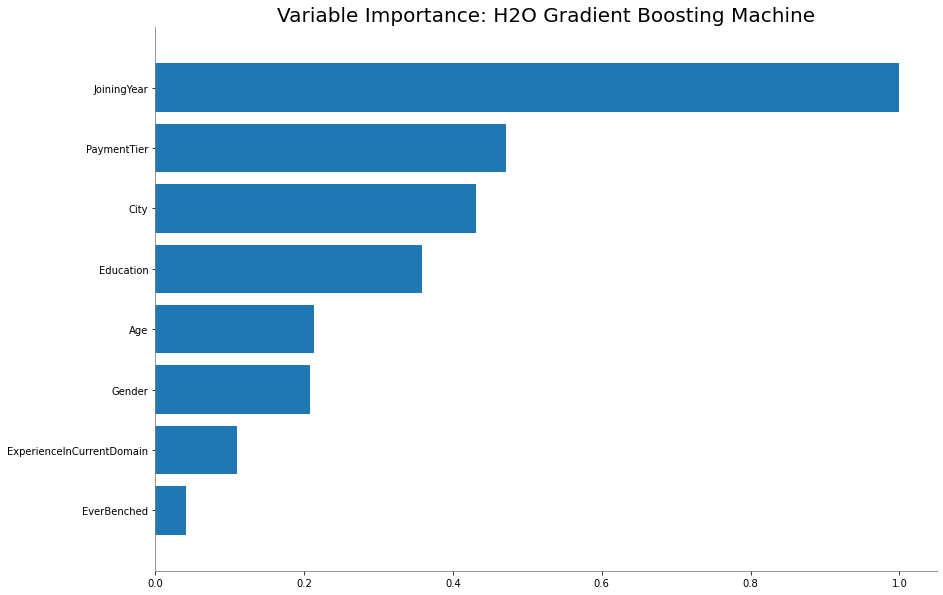

<Figure size 432x288 with 0 Axes>

In [27]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

70
glm


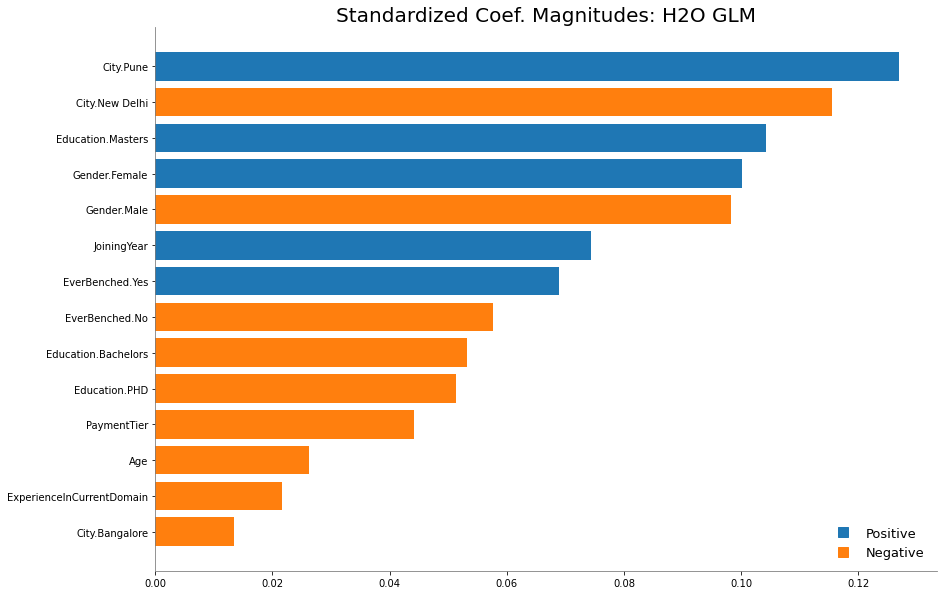

In [28]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(reg_ml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [29]:
print(best_model.rmse(train = True))

0.30340344892732024


In [30]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [31]:
mod_perf=best_model.model_performance(test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.11229974148621595,
 'rmse': 0.3351115358894945,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [32]:
pred = best_model.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [33]:
y_pred=h2o.as_list(pred)
y_pred[0:5]

,predict
0,0.846630
1,0.021863
2,0.121427
3,0.208378
4,0.986642


In [34]:
y_test=h2o.as_list(test[y_numeric])
y_test[0:5]

,LeaveOrNot
0,1
1,0
2,0
3,0
4,1


In [35]:
print(X)

['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'Churn']


In [37]:
reg_pd_df= pd.read_csv('Employee.csv')

In [38]:
reg_pd_df.corr()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Churn
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705,NaN
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638,NaN
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126,NaN
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504,NaN
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000,NaN
Churn,NaN,NaN,NaN,NaN,NaN,NaN


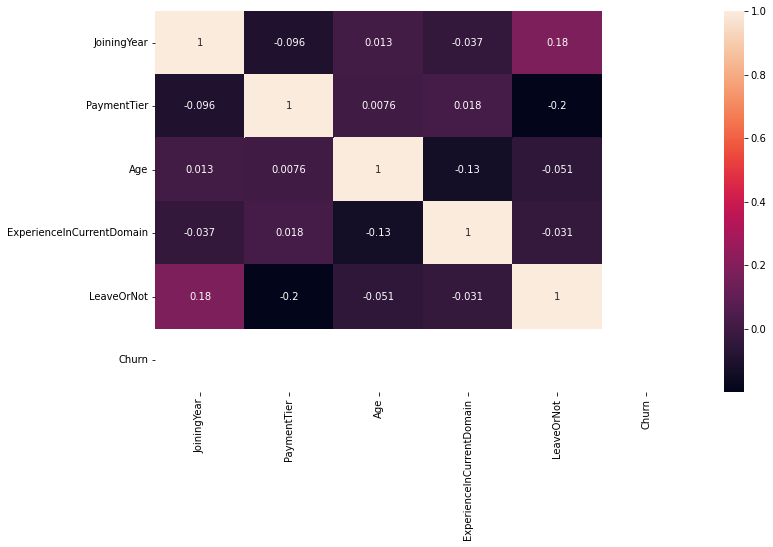

In [39]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.heatmap(reg_pd_df.corr(),annot= True)

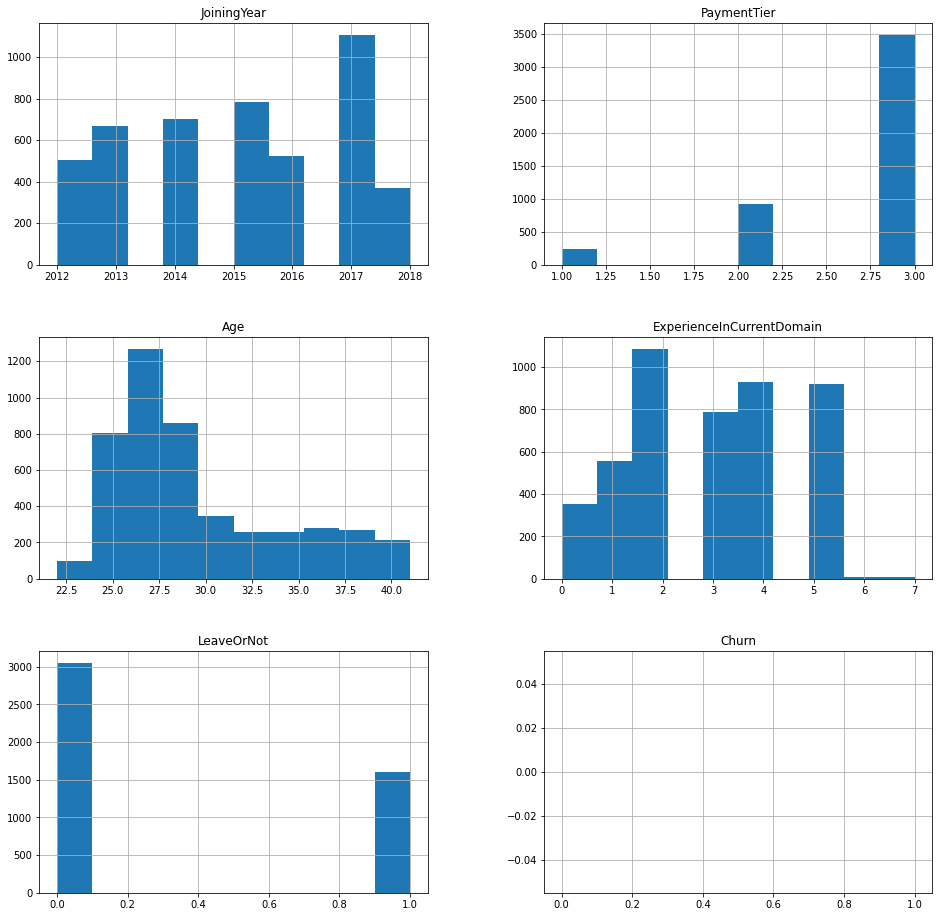

In [40]:
reg_pd_df.hist(figsize=(16,16))
plt.show()

In [41]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

leaveemp = H2OGeneralizedLinearEstimator(family = 'AUTO', lambda_ = 0, remove_collinear_columns = False, compute_p_values = True)

In [42]:
predictors = ["Education", "JoiningYear", "City", "PaymentTier", "Age", "Gender", "EverBenched", "ExperienceInCurrentDomain"]
response = "LeaveOrNot"

leaveemp.train(x = predictors, y = response, training_frame = train, validation_frame = test)

glm Model Build progress: |

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1667886692955_24


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              10                            10                             1                       py_3_sid_b4aa

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.19238871237179664
RMSE: 0.4386213770118787
MAE: 0.38528152689501943
RMSLE: 0.30826211601057624
Mean Residual Deviance: 0.19238871237179664
R^2: 0.1536472015578687
Null degrees of freedom: 3737
Residual degrees of freedom: 3727
Null deviance: 849.7035848047054
Residual deviance: 719.1490068457758
AIC: 4470.873035741151

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.1890424558121677
RMSE: 0.43479012846678994
MAE: 0.37736950865294333
RMSLE: 0.3078151762004873
Mean Residual Deviance: 0.1890424558121677
R^2: 0.13311276486607027
Null degrees of freedom: 914
Residual degrees of freedom: 904
Null deviance: 200.2555430453964
Residual deviance: 172.97384706813344
AIC: 1096.4654712363256

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae         training_r2         validation_rmse      validation_deviance    validation_mae       validation_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  -------------------  ------------------  -------------------  ---------------------  -------------------  -------------------
    2022-11-08 06:07:02  0.000 sec   0             849.7035848047054          0.2273150307128693
    2022-11-08 06:07:02  0.084 sec   1                                                            0.4386213770118787  0.19238871237179664  0.38528152689501943  0.1536472015578687  0.43479012846678994  0.1890424558121677     0.37736950865294333  0.13311276486607027

Variable Importances: 
variable                   relative_importance    scaled_importance    percentage
-------------------------  ---------------------  -------------------  ------------
Gender.Male                0.199843               1                    0.221555
Education.Masters          0.160591               0.803585             0.178038
City.Pune                  0.141426               0.707687             0.156791
EverBenched.Yes            0.128522               0.643117             0.142486
City.New Delhi             0.104744               0.524134             0.116124
JoiningYear                0.074464               0.372612             0.0825541
PaymentTier                0.0439017              0.219681             0.0486714
Age                        0.0263596              0.131902             0.0292235
ExperienceInCurrentDomain  0.0216581              0.108375             0.0240111
Education.PHD              0.000491982            0.00246184           0.000545433

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [46]:
coeff = leaveemp._model_json['output']['coefficients_table']

In [47]:
coeff.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-79.942566,7.995630,-9.998283,3.035576e-23,0.411049
1,Education.Masters,0.160591,0.020960,7.661865,2.321506e-14,0.160591
2,Education.PHD,-0.000492,0.038587,-0.012750,9.898280e-01,-0.000492
3,City.New Delhi,-0.104744,0.020466,-5.117908,3.245411e-07,-0.104744
4,City.Pune,0.141426,0.018104,7.811906,7.270390e-15,0.141426
5,Gender.Male,-0.199843,0.015261,-13.095342,2.427876e-38,-0.199843
6,EverBenched.Yes,0.128522,0.023695,5.424087,6.195493e-08,0.128522
7,JoiningYear,0.040080,0.003968,10.102031,1.089118e-23,0.074464
8,PaymentTier,-0.078049,0.013807,-5.652693,1.697983e-08,-0.043902
9,Age,-0.005465,0.001510,-3.619545,2.990433e-04,-0.026360


In [48]:
leaveemp_regularization = H2OGeneralizedLinearEstimator(family = 'AUTO', lambda_ = .1, alpha = 0)

In [49]:
leaveemp_regularization.train(x = X, y = y, training_frame = train)

NameError: ignored

1. Is the relationship significant?

Answer: The link is statistically insignificant, as evidenced by the fact that all of the independent variables' p-values are more than 0.05, as indicated in the table below.

2. Are any model assumptions violated?

Asnwer: The following model assumptions are used for classification: • It presumes that multicollinearity between the independent variables is either negligible or absent. • Generally, accurate prediction requires a large sample size. Because there is no evidence of multicollinearity in the model and the sample size is substantial, no model assumptions are broken.

3. Is there any multicollinearity in the model?

Answer: Since all of the predictor variables have absolute correlation coefficients that are less than 0.7, it can be inferred from the correlation matrix that no predictor variable is connected to any other predictor variable. Consequently, the model exhibits no multicollinearity.

4. In the multivariate models are predictor variables independent of all the other predictor variables?

Answer: According to the correlation matrix, since each predictor variable's absolute value is less than 0.7, they are all independent of one another.

5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Answer: The variable significance plot indicates that JOINING YEAR is the most important predictor variable. According to the correlation matrix, all predictor variables are independent of one another because their combined absolute values are all less than 0.7. As a result, each predictor is independent of the others and crucial for predicting if the employee will leave or not.

6. Does the model make sense?

Answer: The model does not make sense, as the most significant variable according to the variable significance graph is JOINING YEAR, while the most important variable according to the standardized coefficient magnitude is CITY.

7. Does regularization help?

Answer: Yes, regularization is helpful. The difference in error values between train and test data with model regularization is rather minor, compared to the difference in error values between train and test data with unregularized data that is substantially bigger. Regularization therefore assists in overcoming overfitting.

8. Which independent variables are significant?

Answer: All independent factors are insignificant since none of them have a p-value below 0.05.

9. Which hyperparameters are important?

Answer: The number of trees, number of internal trees, model size in bytes, min depth, max depth, mean depth, min leaves, max leaves, and mean leaves are the hyperparameters that are accessible for the DRF model. First, adjusting without specifying a hyperparameter results in an accuracy of 0.5019. After that, setting ntrees, sample rate, and max depth as DRF model hyperparameters raises accuracy to 0.5027. Accuracy is increased to 0.5062 by raising ntrees and max depth further to 100 and 25, respectively. The accuracy is not improved by increasing the hyperparameters ntrees and max depth to 150 and 30, respectively. 